# Fashion MNIST


### Imports

In [1]:
import keras
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from keras.losses import mean_squared_error
from keras.models import Sequential
from keras.layers import Flatten, Dense, SimpleRNN

Using TensorFlow backend.


### Data

First, load the Fashion MNIST dataset using Keras. It is a collection of more than 6000 images which are represented using 28x28 arrays.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# images are represented as 28x28 arrays...
print(x_train.shape)
# ... with integer pixel intensity from 0 to 255
print(x_train[0,14,:])

(60000, 28, 28)
[  0   0   1   4   6   7   2   0   0   0   0   0 237 226 217 223 222 219
 222 221 216 223 229 215 218 255  77   0]


Two data transformations are necessary: first, we have to split the dataset into a training and a validation set, second, we have to scale features to be bounded in the (0,1) interval. Since the minimum value is 0, min-max scaling only requires to divide by the maximum value.

In [3]:
x_val, x_train = x_train[:5000] / 255.0, x_train[5000:] /255.0
y_val, y_train = y_train[:5000], y_train[5000:]

Numerical labels can be converted to categorical, string, labels according to the following list:

In [4]:
labels = ['T-shirt', 'Troursers', 'Pullover', 'Dress', 'Coat', 'Sandal',
              'Shirt', 'Sneaker', 'Bag', 'Ankle_boot']

Let's plot some items just to have a better idea about the task at hand:

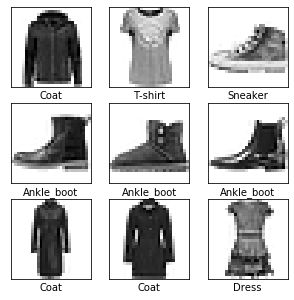

In [5]:
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(labels[y_train[i]])
plt.show()

### Baselines
Model's performances metrics like accuracy and AUC should not be compared to zero, but rather to a very trivial baseline like random-guess or linear regression. Notice that we always use **softmax activation** for the output layer when we are dealing with a classification task over multiple mutually-exclusive classes. Instead, we would use the simpler **sigmoid activation** for binary classification.

In [6]:
baseline = Sequential()
baseline.add(Flatten(input_shape = [28,28]))
baseline.add(Dense(10, activation= 'softmax'))

baseline.compile(loss = 'sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
baseline.fit(x_train, y_train, epochs = 20, validation_data = (x_val, y_val))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 2s 41us/step - loss: 0.8432 - accuracy: 0.7337 - val_loss: 0.6406 - val_accuracy: 0.7974
Epoch 2/20
55000/55000 [==============================] - 2s 41us/step - loss: 0.6032 - accuracy: 0.8036 - val_loss: 0.5652 - val_accuracy: 0.8190
Epoch 3/20
55000/55000 [==============================] - 3s 48us/step - loss: 0.5512 - accuracy: 0.8190 - val_loss: 0.5306 - val_accuracy: 0.8278
Epoch 4/20
55000/55000 [==============================] - 2s 41us/step - loss: 0.5228 - accuracy: 0.8258 - val_loss: 0.5100 - val_accuracy: 0.8336
Epoch 5/20
55000/55000 [==============================] - 3s 46us/step - loss: 0.5047 - accuracy: 0.8318 - val_loss: 0.4944 - val_accuracy: 0.8390
Epoch 6/20
55000/55000 [==============================] - 2s 44us/step - loss: 0.4916 - accuracy: 0.8347 - val_loss: 0.4838 - val_accuracy: 0.8410
Epoch 7/20
55000/55000 [==============================] - 2s 38us/ste

### Model
Use a fully connected network with two hiddens layers.

In [7]:
model = Sequential()
model.add(Flatten(input_shape = [28,28]))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(10, activation= 'softmax'))

To see how many parameters the network has, we can use the **summary( )** method. Notice that FC layers tend to have lots of parameters!

In [8]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


It's time to compile the model by telling Keras which loss function and optimizer we would like to use. Furthermore, we can also provide additional metrics to keep track of. In this case, we use **sparse_categorical_crossentropy** because we have multiple classes, which are mutually exclusive and sparse, as they have not been one-hot-encoded. Instead, if we had proceeded with one-hot encoding we would be using **categorical_crossentropy** loss instead. Finally, when the problem is binary we can simply choose **binary_crossentropy** as the loss function.

In [9]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

Finally, we are ready to train the model by calling its **fit( )** method.

In [10]:
history = model.fit(x_train, y_train, epochs = 30, validation_data = (x_val, y_val))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 72us/step - loss: 0.7781 - accuracy: 0.7400 - val_loss: 0.5238 - val_accuracy: 0.8220
Epoch 2/30
55000/55000 [==============================] - 3s 60us/step - loss: 0.5042 - accuracy: 0.8247 - val_loss: 0.5058 - val_accuracy: 0.8272
Epoch 3/30
55000/55000 [==============================] - 4s 64us/step - loss: 0.4568 - accuracy: 0.8399 - val_loss: 0.4456 - val_accuracy: 0.8444
Epoch 4/30
55000/55000 [==============================] - 3s 58us/step - loss: 0.4297 - accuracy: 0.8496 - val_loss: 0.4073 - val_accuracy: 0.8606
Epoch 5/30
55000/55000 [==============================] - 3s 56us/step - loss: 0.4102 - accuracy: 0.8554 - val_loss: 0.3940 - val_accuracy: 0.8648
Epoch 6/30
55000/55000 [==============================] - 3s 56us/step - loss: 0.3952 - accuracy: 0.8609 - val_loss: 0.3872 - val_accuracy: 0.8654
Epoch 7/30
55000/55000 [==============================] - 3s 56us/ste

The history object that is returned when training the model contains much useful information about the training itself. Especially, we can use it to retrieve and plot **learning curves**.

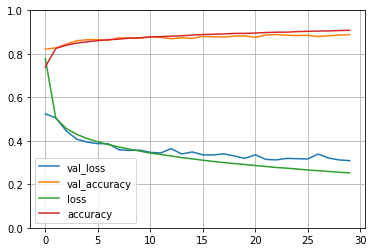

In [11]:
pd.DataFrame(history.history).plot(figsize = (6,4))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

To evaluated the model's performances on the test set we can simply call the **evaluate()** method, which will return the loss and the others metrics that keras has been told to track (accuracy, in this case).

In [12]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 32us/step


[87.3546055480957, 0.8130000233650208]

Finally, we can make predictions on new data and compare predicted labels (x_axis) with actual labels (y_axis).

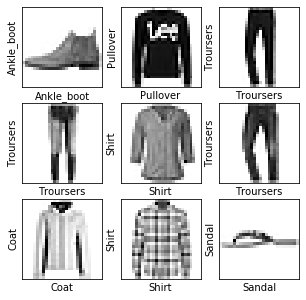

In [13]:
y_proba = model.predict(x_test[:9])
y_preds = model.predict_classes(x_test[:9])

# plot actual vs predicted classes
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.ylabel(labels[y_test[i]])
    plt.xlabel(labels[y_preds[i]])
plt.show()